# Import module


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mordor_sd_assim import mordor_sd
import datetime
import litres
from save_tools import *
import properscoring as ps



# Reading of file containing the forecast

In [3]:
def lec_compute_rmse(infile):
    """
   
    """
       
    print('lecture ', infile)
    data_0 = lec_tabs(infile)
    
    cumulQ     = data_0['cumulQ']
    Qobs_hiver      = data_0['Qobs_hiver']
    Sobs_hiver      = data_0['Sobs_hiver']
    Qobs_ete      = data_0['Qobs_ete']
    Sobs_ete      = data_0['Sobs_ete']
    S_1_ens    = data_0['S_1_ens']
    S_2_ens    = data_0['S_2_ens']
    S_3_ens    = data_0['S_3_ens']
    S_4_ens    = data_0['S_4_ens']
    S_5_ens    = data_0['S_5_ens']
    S_6_ens    = data_0['S_6_ens']
    S_7_ens    = data_0['S_7_ens']
    S_8_ens    = data_0['S_8_ens']
    S_9_ens    = data_0['S_9_ens']
    S_10_ens   = data_0['S_10_ens']
    Q_ens      = data_0['Q_ens']
    S_ens      = data_0['S_ens']
    YYYY       = data_0['DATE'][0, :]
    mm         = data_0['DATE'][1, :]
    dd         = data_0['DATE'][2, :]
    HH         = data_0['DATE'][3, :]
    MM         = data_0['DATE'][4, :]
    
    npdt, n_ens = np.shape(Q_ens)
    
    # date list
    Date = list()
    for i_t in range(npdt):
        Date.append(datetime.datetime(year=int(YYYY[i_t]), month=int(mm[i_t]), day=int(dd[i_t])))
    
    
    return Date, Qobs_hiver, Sobs_hiver,Qobs_ete, Sobs_ete, S_8_ens,  Q_ens,  S_ens,cumulQ 
    


In [4]:
annee=2008
pourc_cumul = list()

for i in range (10):
    file_in = "fichier_sauv_previ"+"_"+str(annee+i)+".nc"
    Date, Qobs_hiver, Sobs_hiver,Qobs_ete, Sobs_ete, S_8_ens,  Q_ens, S_ens,cumulQ = lec_compute_rmse(file_in)
    print
    pourc = 100*np.std(cumulQ)/np.mean(cumulQ)
    pourc_cumul.append( pourc )
    print pourc_cumul

('lecture ', 'fichier_sauv_previ_2008.nc')

[12.142897758125946]
('lecture ', 'fichier_sauv_previ_2009.nc')

[12.142897758125946, 12.842183928245882]
('lecture ', 'fichier_sauv_previ_2010.nc')

[12.142897758125946, 12.842183928245882, 12.917871197681766]
('lecture ', 'fichier_sauv_previ_2011.nc')

[12.142897758125946, 12.842183928245882, 12.917871197681766, 13.890364867985172]
('lecture ', 'fichier_sauv_previ_2012.nc')

[12.142897758125946, 12.842183928245882, 12.917871197681766, 13.890364867985172, 11.076659684024033]
('lecture ', 'fichier_sauv_previ_2013.nc')

[12.142897758125946, 12.842183928245882, 12.917871197681766, 13.890364867985172, 11.076659684024033, 11.290402673166177]
('lecture ', 'fichier_sauv_previ_2014.nc')

[12.142897758125946, 12.842183928245882, 12.917871197681766, 13.890364867985172, 11.076659684024033, 11.290402673166177, 11.887434914951294]
('lecture ', 'fichier_sauv_previ_2015.nc')

[12.142897758125946, 12.842183928245882, 12.917871197681766, 13.890364867985172, 

# Plot

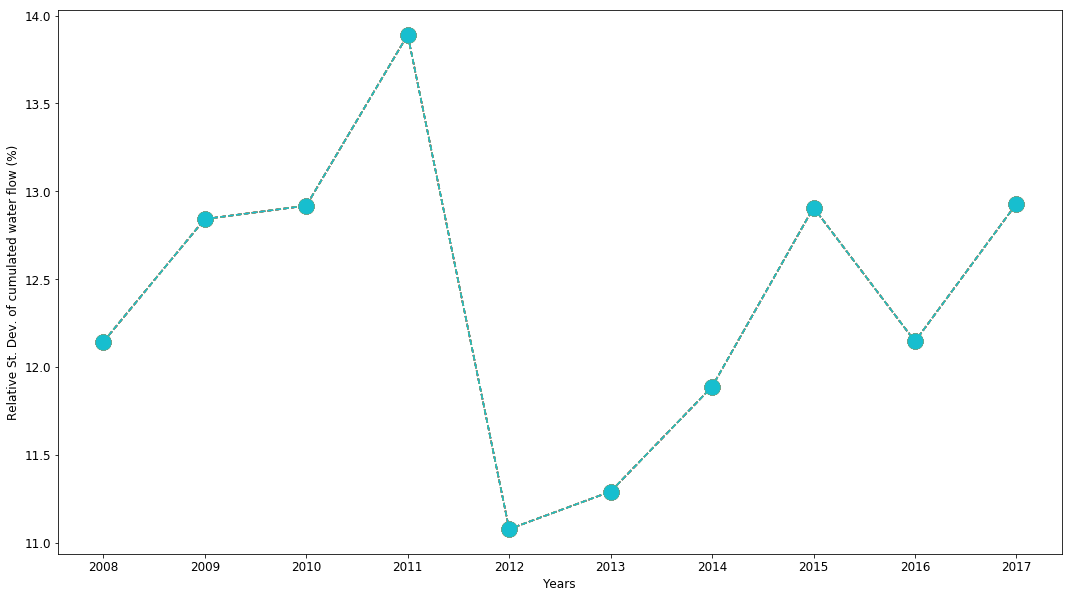

In [5]:
matplotlib.rcParams['font.size'] = 7.
# matplotlib.rcParams['figure.titlesize'] = 12.
matplotlib.rcParams['axes.labelsize'] = 12.
matplotlib.rcParams['xtick.labelsize'] = 12.
matplotlib.rcParams['ytick.labelsize'] = 12.

#color= ["brown"]
#liste_color  = ["black", "red", "blue","coral", "brown", "gold", "green", "magenta","navy", "pink"]
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
# 25%
fig = plt.figure(1, figsize=(18, 10))
for i in range (10):
    plt.plot(years ,pourc_cumul, 'o--',markersize=15, )  

plt.xticks(np.arange(2008, 2018, 1)) 
plt.xlabel("Years",  fontsize=12)
plt.ylabel('Relative St. Dev. of cumulated water flow (%)', fontsize=12)
#plt.legend(loc=2, prop={'size': 12})
#plt.show()

plt.show()

